<a href="https://colab.research.google.com/github/Manisha20th/Sales_Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales** **Analysis**

In [2]:
import pandas as pd
import os

Task 1: Merge 12 months of sales data into a single csv file

In [4]:
df = pd.read_csv("/content/sample_data/Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("/content/sample_data/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("/content/sample_data/Sales_Data/" + file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)


In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Clean up the data

In [6]:
# Drop rows of NaN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Find 'Or' and delete it

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


Convert columns to correct type

In [42]:
# make int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
# make float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

**Augment data with additional columns**

Task 2: Add Month Column

In [8]:
def format_month(date_string):
    if isinstance(date_string, str) and len(date_string) > 1 and date_string[1] == '/':
        return '0' + date_string
    return date_string

all_data['Order Date'] = all_data['Order Date'].apply(format_month)
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [9]:
# Filter for single-digit months
single_digit_months_df = all_data[all_data['Month'].between(1, 9)]

# Display the first few rows of the filtered DataFrame
display(single_digit_months_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1563,297150,Lightning Charging Cable,1,14.95,01/01/20 00:38,"427 Wilson St, Dallas, TX 75001",1
2265,297817,iPhone,1,700,01/01/20 00:22,"519 13th St, New York City, NY 10001",1
2266,297817,Lightning Charging Cable,2,14.95,01/01/20 00:22,"519 13th St, New York City, NY 10001",1
2425,297969,Google Phone,1,600,01/01/20 00:54,"542 2nd St, San Francisco, CA 94016",1
2806,298344,Wired Headphones,4,11.99,01/01/20 03:34,"731 7th St, New York City, NY 10001",1


Task 3: Add a sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Task 4: Add a city column

In [13]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


Q1: What was the best month for sales? How much was earned that month?

In [14]:
monthly_summary = all_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'sum',
    'Sales': 'sum'
})
display(monthly_summary)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [15]:
results = monthly_summary

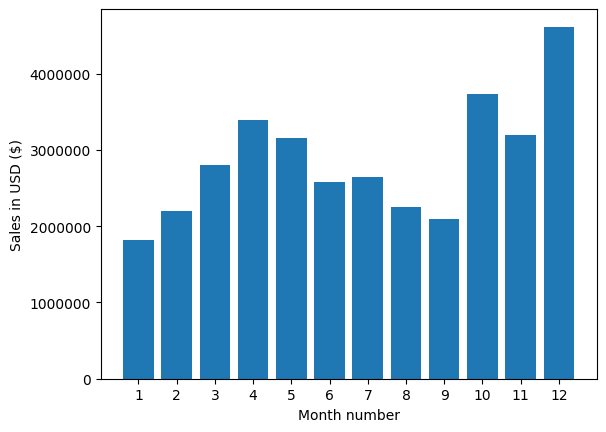

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

# Format the y-axis labels to display full numbers
formatter = mticker.FormatStrFormatter('%1.f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Q2: What city had the highest number of sales?


In [17]:
city_summary = all_data.groupby('City').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean',
    'Sales': 'sum'
})
display(city_summary)

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,186.809233,2795498.58
Austin (TX),11153,182.723232,1819581.75
Boston (MA),22528,182.472648,3661642.01
Dallas (TX),16730,185.737370,2767975.40
Los Angeles (CA),33289,183.125662,5452570.80
New York City (NY),27932,186.339075,4664317.43
Portland (ME),2750,182.154481,449758.27
Portland (OR),11303,185.869952,1870732.34
San Francisco (CA),50239,183.570190,8262203.91


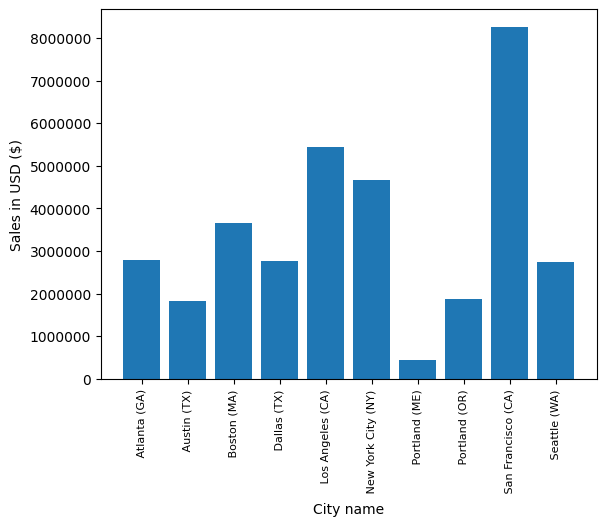

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, city_summary['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')

# Format the y-axis labels to display full numbers
formatter = mticker.FormatStrFormatter('%1.f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Q3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/tmp/ipython-input-3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [23]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


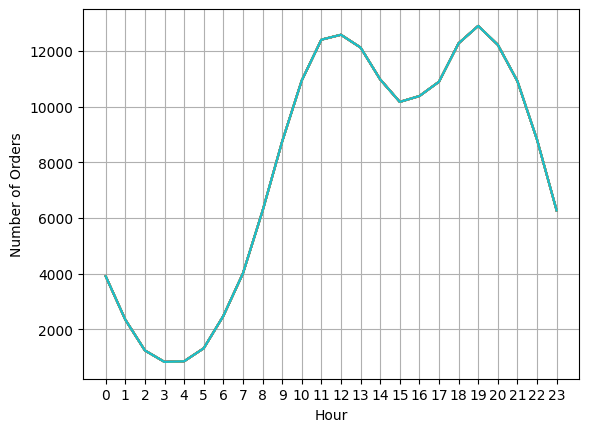

In [24]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# Get insights that 11am (11) or 7pm (19) is the best time for advertisement

Q4: What products are most often sold together?

In [31]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df ['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(10)

/tmp/ipython-input-640665536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [33]:
from itertools import combinations
from collections import Counter

In [36]:
count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 3)))
for key, value in count.most_common(10):
  print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


  Q5: What product sold the most? Why do you think it sold the most?

In [37]:
product_summary = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
display(product_summary.head())

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557


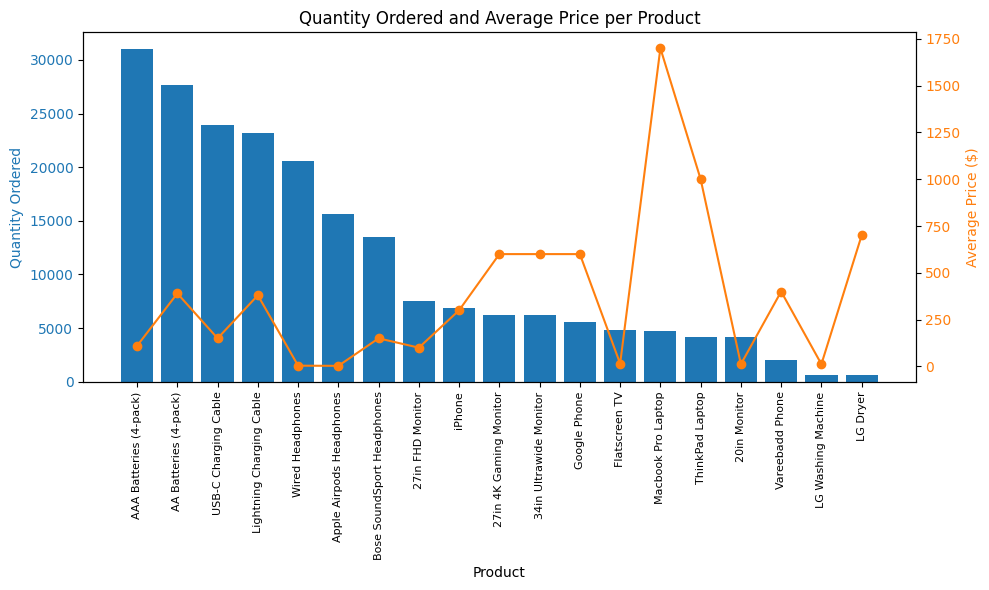

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

products = [product for product, quantity in product_summary.items()]
quantities = [quantity for product, quantity in product_summary.items()]
prices = all_data.groupby('Product')['Price Each'].mean()

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
ax1 = plt.gca() # Get the current axes
ax2 = ax1.twinx() # Create a second axes that shares the same x-axis

# Plot quantity ordered on the primary y-axis
ax1.bar(products, quantities, color='C0')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation='vertical', size=8)

# Plot average price on the secondary y-axis
ax2.plot(products, prices, color='C1', marker='o')
ax2.set_ylabel('Average Price ($)', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Quantity Ordered and Average Price per Product')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

***Key insights from our entire sales data analysis:***

Seasonal Sales Peaks: Sales show a strong seasonal pattern, with December being the best month for sales, likely driven by holiday shopping. October and November also show high sales, indicating a busy Q4 period. This suggests opportunities for targeted marketing campaigns during these months.

Top Performing City: San Francisco stands out as the city with the highest sales volume, making it a crucial market to focus on for sales and marketing efforts. Other cities like Los Angeles and New York City also show significant sales.

Optimal Advertising Times: The peak hours for orders are around 11 AM and 7 PM. Concentrating advertisements during these times could lead to maximum visibility and potentially higher conversion rates.

Product Bundling Opportunities: The analysis of frequently sold together products reveals common purchase patterns, such as mobile phones bundled with charging accessories and headphones. This insight is valuable for creating product bundles, cross-selling strategies, and optimizing product placement.

Price vs. Quantity Relationship: There's a general inverse relationship between product price and quantity ordered – lower-priced items like batteries and charging cables sell in much higher volumes. However, popular higher-priced items like iPhones and Google Phones still maintain strong sales, indicating brand influence and demand. Very high-priced items like major appliances (washer, dryer) have the lowest sales volume, as expected.

Most Popular Product: AAA Batteries (4-pack) is the most sold product by quantity, highlighting the consistent demand for essential, low-cost accessories.

These insights provide a detailed picture of sales performance across different dimensions, including time, location, product relationships, and price correlation.
 This information can be used to refine sales strategies, optimize marketing campaigns, manage inventory, and improve the overall customer experience.